In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os
from pandas.core.frame import DataFrame
import plotly.express as px
import datetime
import plotly.graph_objects as go

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from math import sqrt
import gc

## Functions

In [6]:
result_dir = "result/"
#data_name_list = ['aqi_data', 'aqi_traffic_tree_data', 'aqi_tree_data', 'aqi_traffic_data']

def read_and_process_file_csv(data_type: str, data_name: str):
    return pd.read_csv(f"{result_dir}{data_name}_y_{data_type}.csv", index_col='index').rename(columns={'0': data_type})

In [2]:
def get_result_by_data_type(data_name: str):

    # read the actual and predicted
    actual = read_and_process_file_csv('actual',data_name)
    pred_dtree = read_and_process_file_csv('pred_dtree',data_name)
    pred_lgbm = read_and_process_file_csv('pred_lgbm',data_name)
    pred_random_forest = read_and_process_file_csv('pred_random_forest',data_name)
    pred_svm = read_and_process_file_csv('pred_svm',data_name)
    pred_xgboost = read_and_process_file_csv('pred_xgboost',data_name)

    frames = [actual, pred_dtree, pred_lgbm,pred_random_forest, pred_svm, pred_xgboost]
    result = pd.concat(frames, axis=1)
    result = result.dropna()

    return result

In [11]:
def plot_chart(result):
    title = 'AQI Forecasting Performance'
    labels = result.columns.values
    x_data = result.index.values

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=x_data, y=result['actual'], mode='lines',
                            name='actual',
                            connectgaps=True,
                            ))

    for col_name in result.loc[:, result.columns != 'actual'].columns:
        fig.add_trace(go.Scatter(x=x_data, y=result[col_name], mode='lines',
                                name=col_name,
                                connectgaps=True,
                                ))

    fig.update_layout(
        xaxis=dict(
            showline=True,
            showgrid=False,
            showticklabels=True,
            linecolor='rgb(204, 204, 204)',
            linewidth=2,
            ticks='outside',
            tickfont=dict(
                family='Arial',
                size=12,
                color='rgb(82, 82, 82)',
            ),
        ),
        yaxis=dict(
            showgrid=False,
            zeroline=False,
            showline=True,
            showticklabels=True,
        ),
        autosize=True,
        margin=dict(
            autoexpand=True,
            l=80,
            r=20,
            t=80,
        ),
        showlegend=True,
        plot_bgcolor='white'
    )

    annotations = []

    annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                            xanchor='left', yanchor='bottom',
                            text='Proposed AQI Forecasting Performance',
                            font=dict(family='Arial',
                                    size=26,
                                    color='rgb(37,37,37)'),
                            showarrow=False))

    fig.update_layout(annotations=annotations)

    return fig

In [4]:
def plot_score_chart(result):
    for col_name in result.columns:
      y_test = result['actual']
      y_pred = result[col_name]
      print('MODEL :%s\n' % col_name,
            'R^2= %.3f\n' % r2_score(y_test, y_pred),
            'MSE= %.3f\n' % mean_squared_error(y_test, y_pred),
            'MAE= %.3f\n' % mean_absolute_error(y_test, y_pred))
      fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
      axs[0].set_title("Predicted/Observed")
      axs[0].set_xlabel("Observed")
      axs[0].set_ylabel("Predicted")
      axs[0].scatter(x=y_test, y=y_pred, color="g", marker="o", alpha=0.5)

      axs[1].set_title("Error distribution")
      axs[1].set_xlabel("X")
      axs[1].set_ylabel("Y")
      axs[1].hist(y_pred-y_test, bins=10, rwidth=0.6, density=True)
      gc.collect()

## Experimental

#### For aqi_traffic_tree_data

In [17]:
# for full of data
df_aqi_traffic_tree = get_result_by_data_type('aqi_traffic_tree_data')

In [15]:
plot_chart(df_aqi_traffic_tree)

MODEL :actual
 R^2= 1.000
 MSE= 0.000
 MAE= 0.000

MODEL :pred_dtree
 R^2= 0.936
 MSE= 14.886
 MAE= 2.777

MODEL :pred_lgbm
 R^2= 0.953
 MSE= 10.764
 MAE= 2.348

MODEL :pred_random_forest
 R^2= 0.963
 MSE= 8.600
 MAE= 2.075

MODEL :pred_svm
 R^2= 0.972
 MSE= 6.453
 MAE= 1.703

MODEL :pred_xgboost
 R^2= 0.954
 MSE= 10.619
 MAE= 2.430



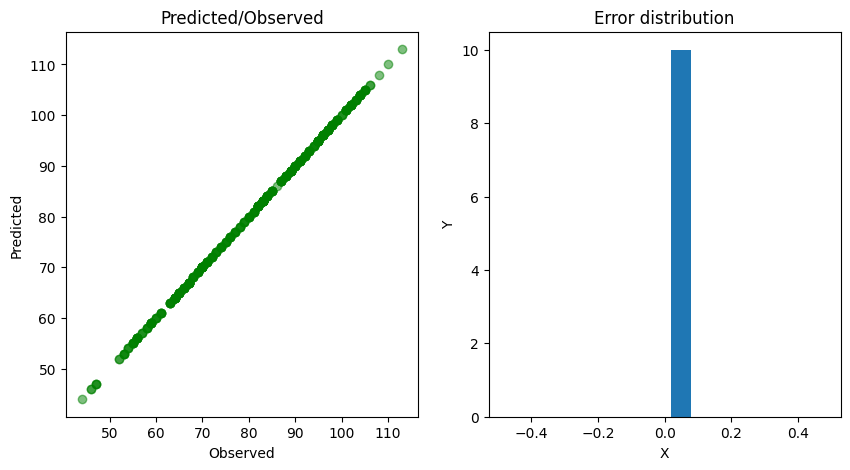

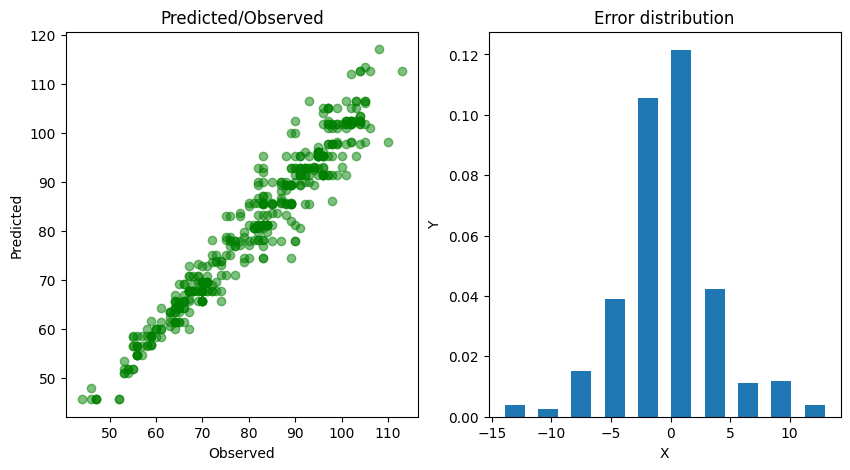

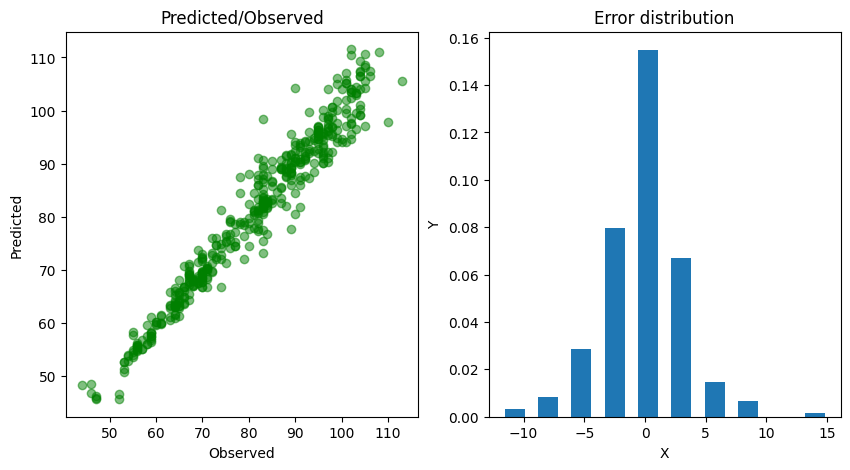

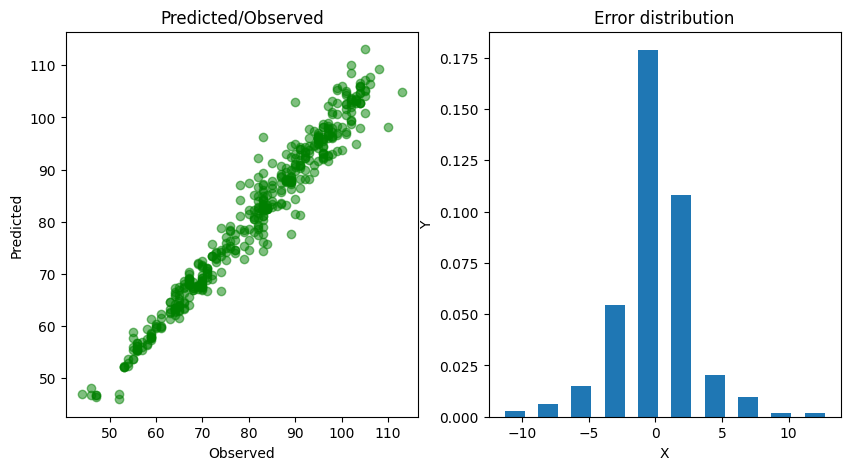

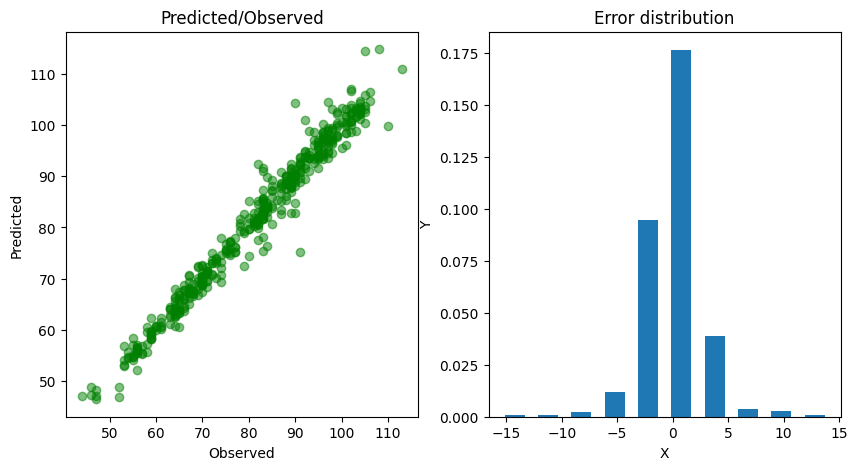

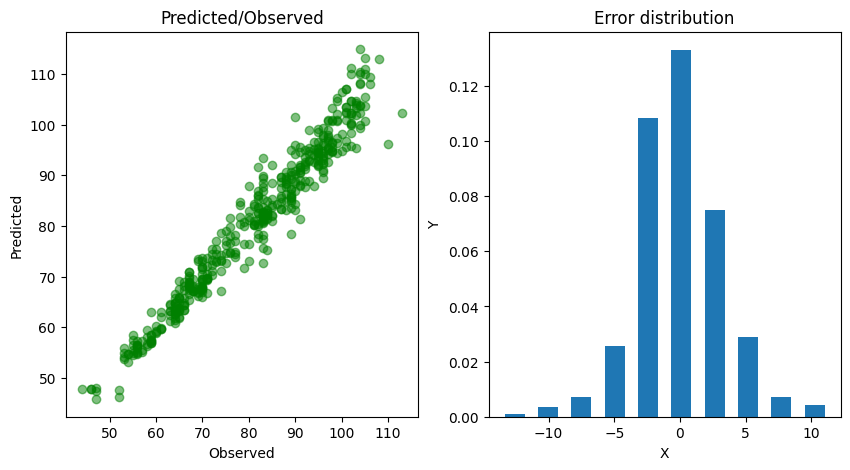

In [16]:
plot_score_chart(df_aqi_traffic_tree)

#### For aqi_traffic_data

In [18]:
# for full of data
df_aqi_traffic = get_result_by_data_type('aqi_traffic_data')

In [19]:
plot_chart(df_aqi_traffic)

MODEL :actual
 R^2= 1.000
 MSE= 0.000
 MAE= 0.000

MODEL :pred_dtree
 R^2= 0.931
 MSE= 15.946
 MAE= 2.838

MODEL :pred_lgbm
 R^2= 0.953
 MSE= 10.764
 MAE= 2.348

MODEL :pred_random_forest
 R^2= 0.963
 MSE= 8.605
 MAE= 2.075

MODEL :pred_svm
 R^2= 0.969
 MSE= 7.213
 MAE= 1.873

MODEL :pred_xgboost
 R^2= 0.954
 MSE= 10.619
 MAE= 2.430



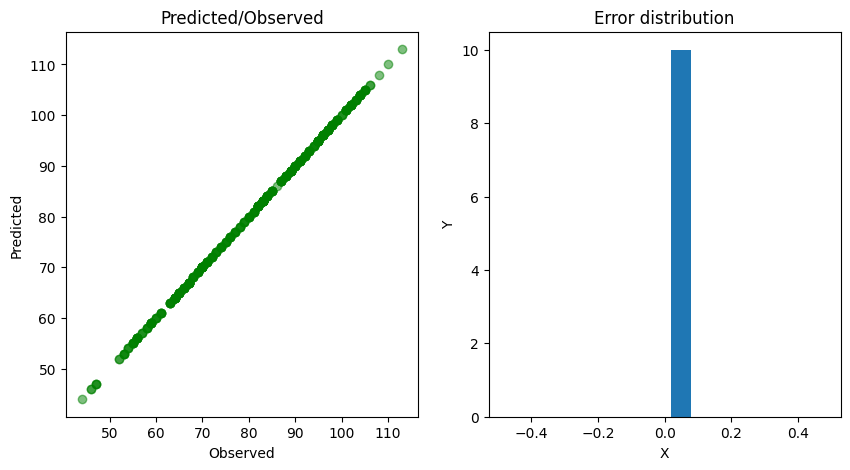

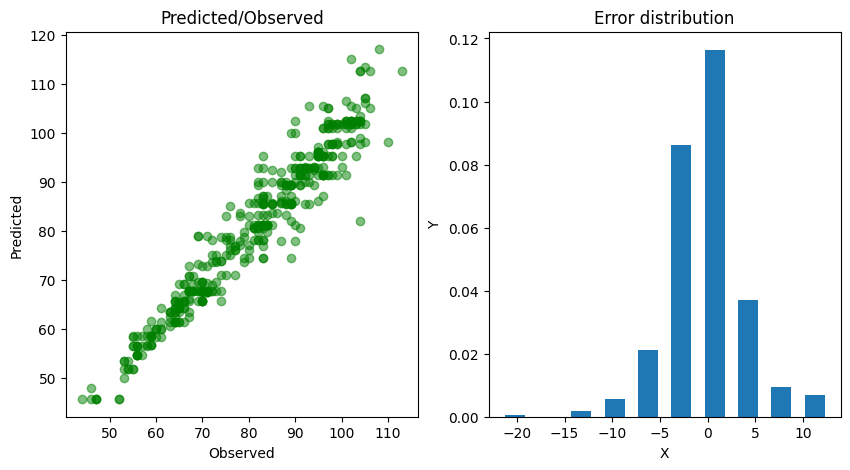

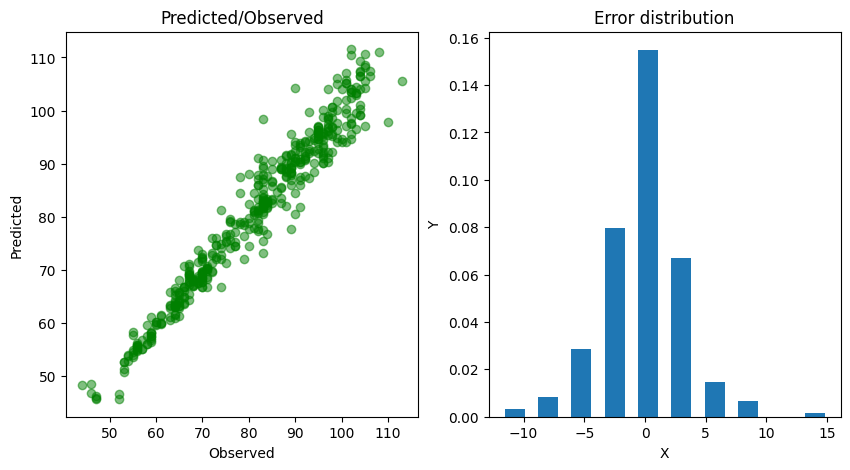

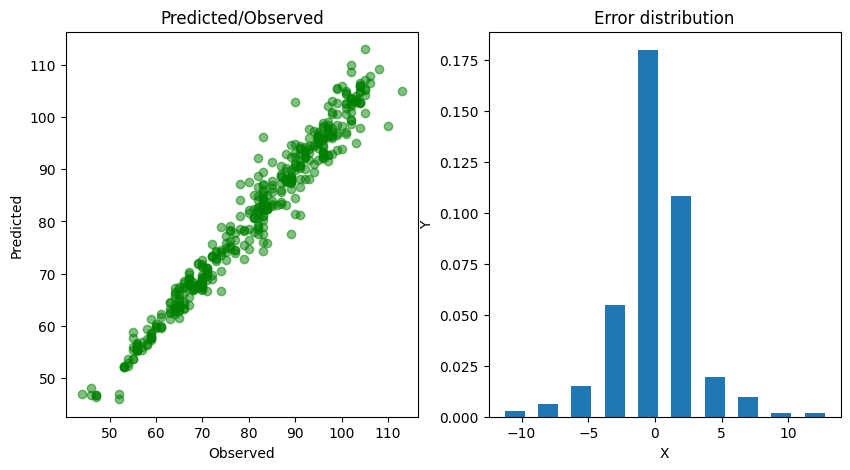

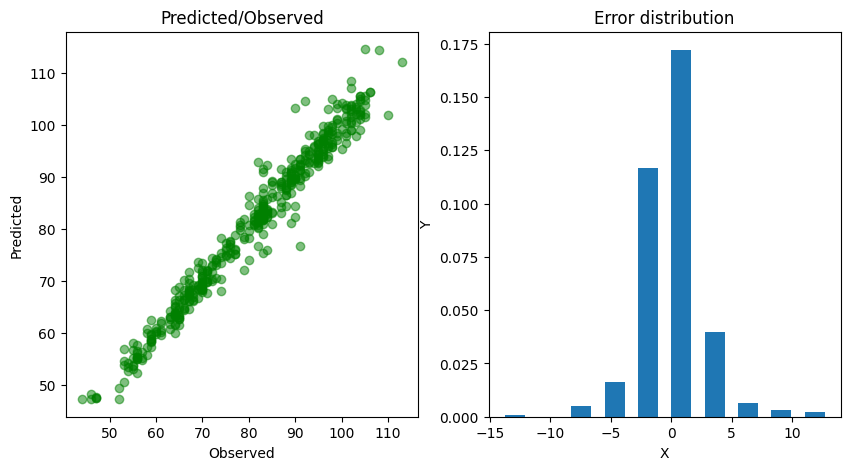

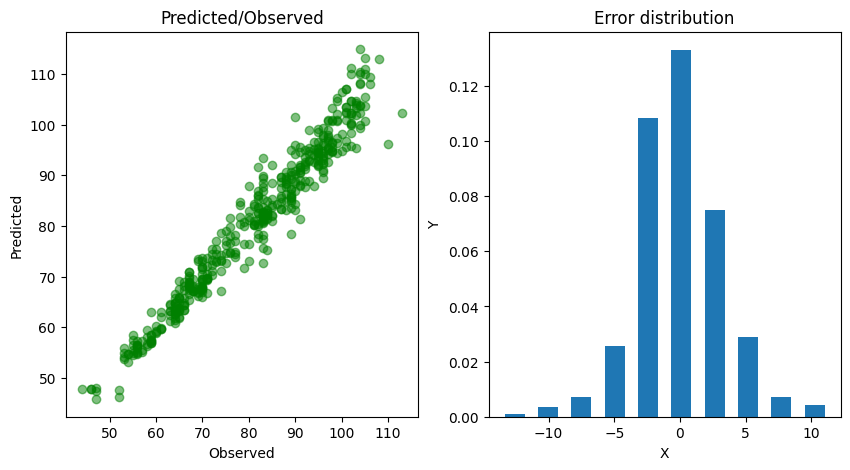

In [20]:
plot_score_chart(df_aqi_traffic)

#### For aqi_tree_data

In [21]:
# for full of data
df_aqi_tree = get_result_by_data_type('aqi_traffic_data')

In [22]:
plot_chart(df_aqi_tree)

MODEL :actual
 R^2= 1.000
 MSE= 0.000
 MAE= 0.000

MODEL :pred_dtree
 R^2= 0.931
 MSE= 15.946
 MAE= 2.838

MODEL :pred_lgbm
 R^2= 0.953
 MSE= 10.764
 MAE= 2.348

MODEL :pred_random_forest
 R^2= 0.963
 MSE= 8.605
 MAE= 2.075

MODEL :pred_svm
 R^2= 0.969
 MSE= 7.213
 MAE= 1.873

MODEL :pred_xgboost
 R^2= 0.954
 MSE= 10.619
 MAE= 2.430



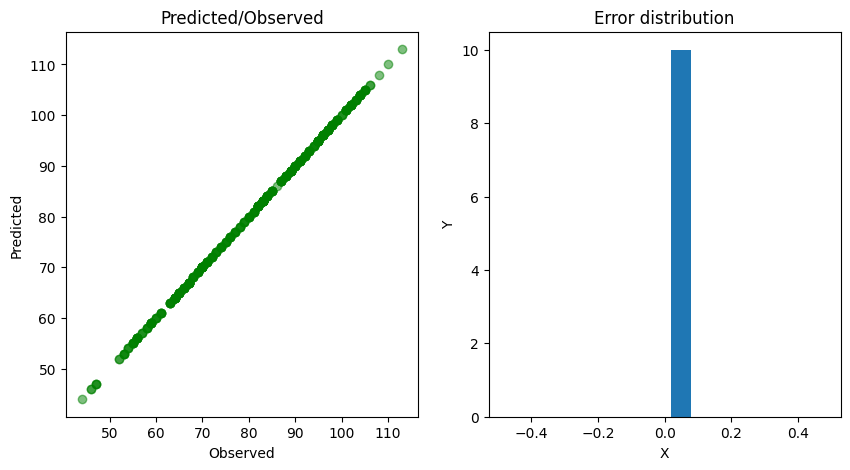

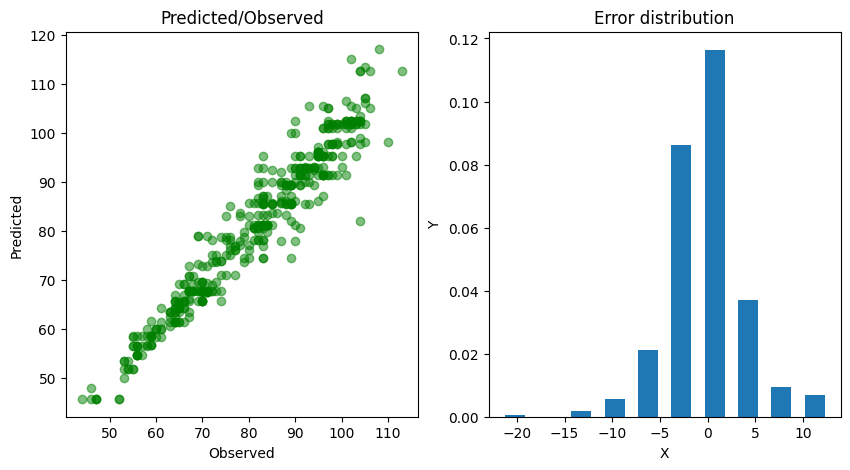

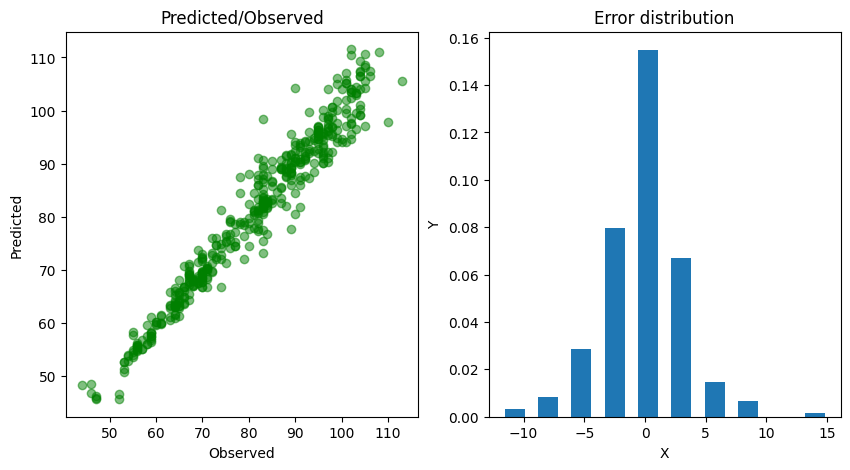

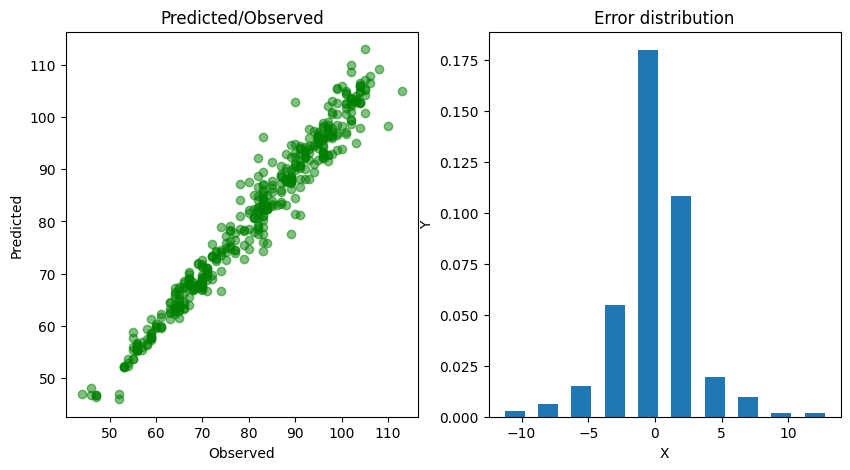

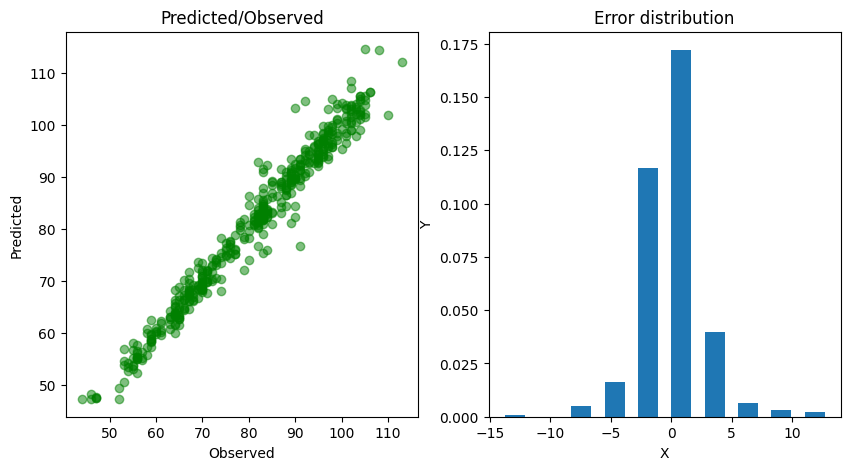

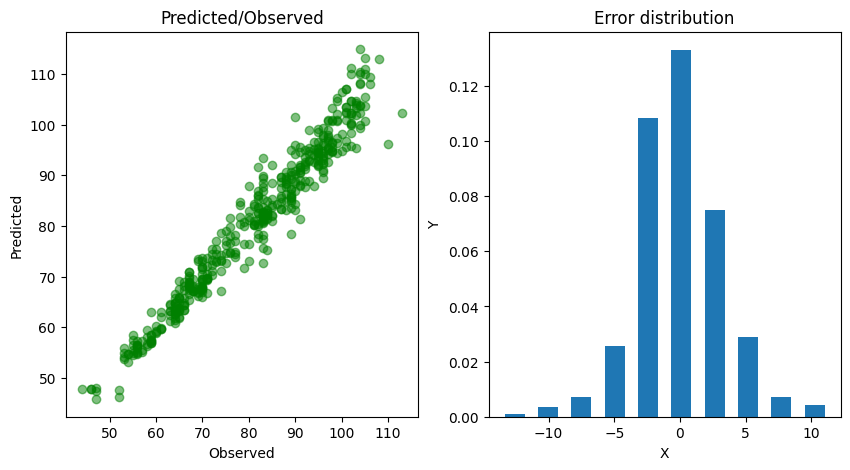

In [23]:
plot_score_chart(df_aqi_tree)

#### For aqi_data

In [26]:
# for full of data
df_aqi = get_result_by_data_type('aqi_data')
df_aqi

,actual,pred_dtree,pred_lgbm,pred_random_forest,pred_svm,pred_xgboost
index,,,,,,
0,51.0,51.266667,50.702035,51.042754,-1.498625e+33,50.916860
1,51.0,51.266667,50.915859,51.281896,-1.184138e+33,51.304657
2,50.0,51.266667,50.194789,50.853550,-1.665481e+33,50.640373
3,50.0,51.266667,50.438811,50.617591,-1.864483e+33,50.517130
4,51.0,45.000000,49.782921,50.355853,-1.670688e+33,50.329700
...,...,...,...,...,...,...
453,91.0,87.454545,89.558049,90.704260,1.416708e+33,89.856610
454,90.0,87.454545,89.246578,90.793429,-1.425724e+32,92.437570
455,91.0,87.454545,93.185886,91.632609,-2.450766e+33,91.659880


In [30]:
# remove svm for this data
df_aqi.drop('pred_svm', axis=1, inplace=True)

In [32]:
plot_chart(df_aqi)

MODEL :actual
 R^2= 1.000
 MSE= 0.000
 MAE= 0.000

MODEL :pred_dtree
 R^2= 0.938
 MSE= 15.747
 MAE= 2.892

MODEL :pred_lgbm
 R^2= 0.962
 MSE= 9.601
 MAE= 2.205

MODEL :pred_random_forest
 R^2= 0.966
 MSE= 8.593
 MAE= 2.090

MODEL :pred_xgboost
 R^2= 0.959
 MSE= 10.340
 MAE= 2.287



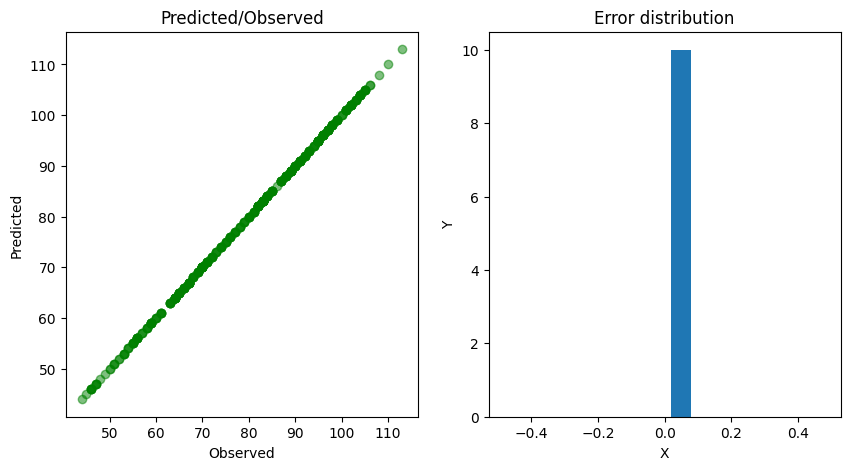

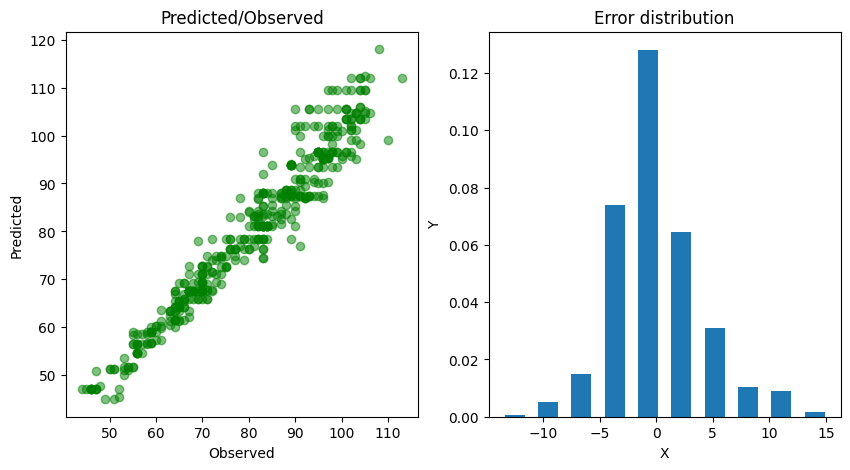

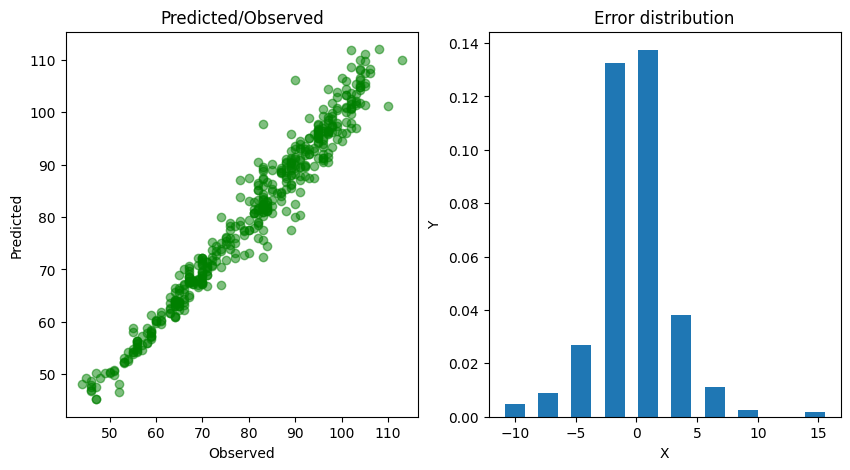

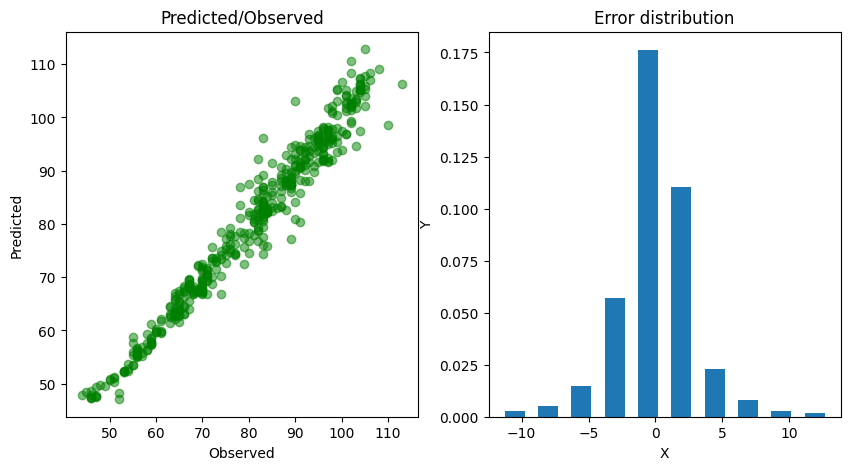

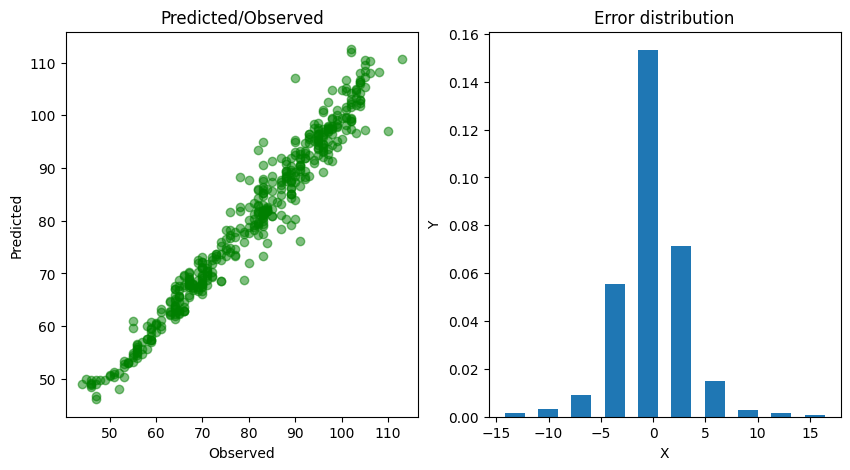

In [34]:
plot_score_chart(df_aqi)

## Result for full data

In [15]:
title = 'AQI Forecasting Performance'

labels = result.columns.values

x_data = result.index.values

fig = go.Figure()


fig.add_trace(go.Scatter(x=x_data, y=result['actual'], mode='lines',
                         name='actual',
                         connectgaps=True,
                         ))

for col_name in result.loc[:, result.columns != 'actual'].columns:
    fig.add_trace(go.Scatter(x=x_data, y=result[col_name], mode='lines',
                             name=col_name,
                             connectgaps=True,
                             ))

fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=True,
        showticklabels=True,
    ),
    autosize=True,
    margin=dict(
        autoexpand=True,
        l=80,
        r=20,
        t=80,
    ),
    showlegend=True,
    plot_bgcolor='white'
)

annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                        xanchor='left', yanchor='bottom',
                        text='Proposed AQI Forecasting Performance',
                        font=dict(family='Arial',
                                  size=26,
                                  color='rgb(37,37,37)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)


MODEL :actual
 R^2= 1.000
 MSE= 0.000
 MAE= 0.000

MODEL :pred_dtree
 R^2= 0.931
 MSE= 15.863
 MAE= 2.822

MODEL :pred_lgbm
 R^2= 0.953
 MSE= 10.764
 MAE= 2.348

MODEL :pred_random_forest
 R^2= 0.963
 MSE= 8.599
 MAE= 2.075

MODEL :pred_svm
 R^2= 0.973
 MSE= 6.166
 MAE= 1.641

MODEL :pred_xgboost
 R^2= 0.954
 MSE= 10.619
 MAE= 2.430



10

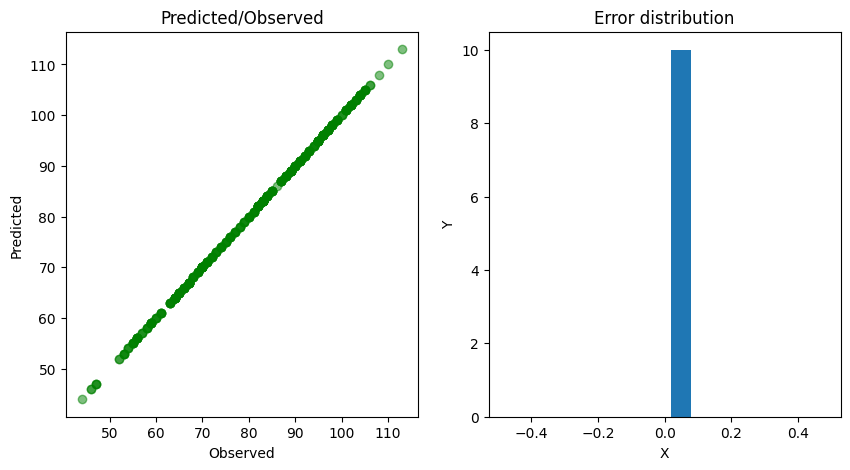

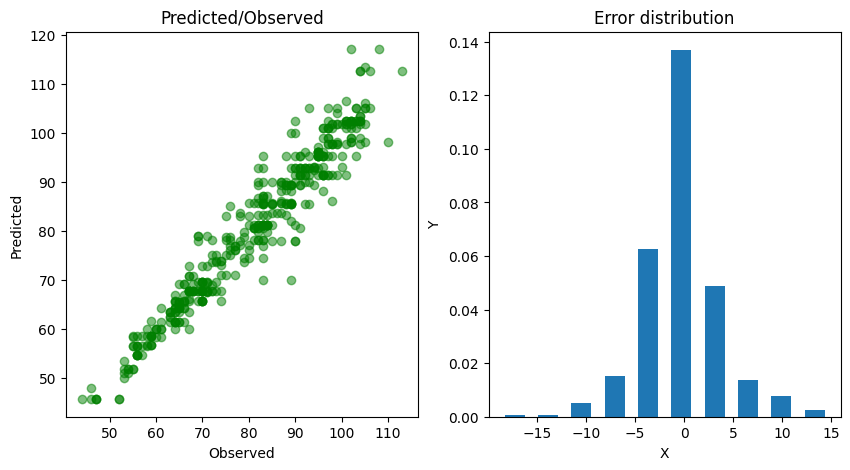

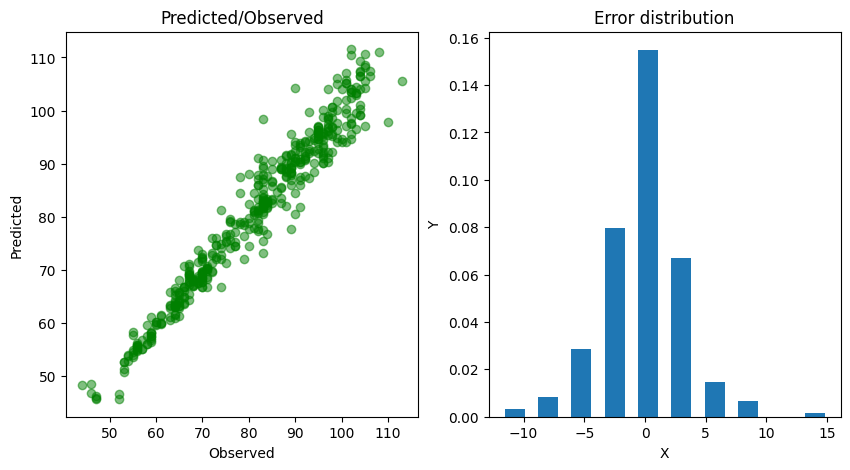

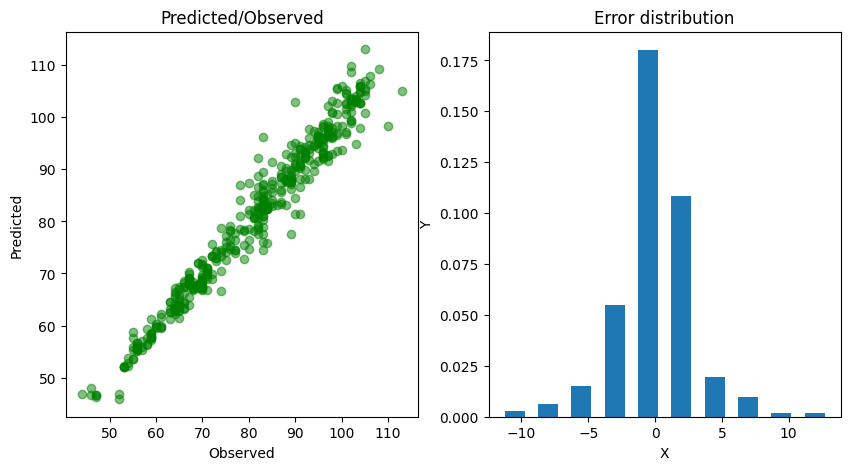

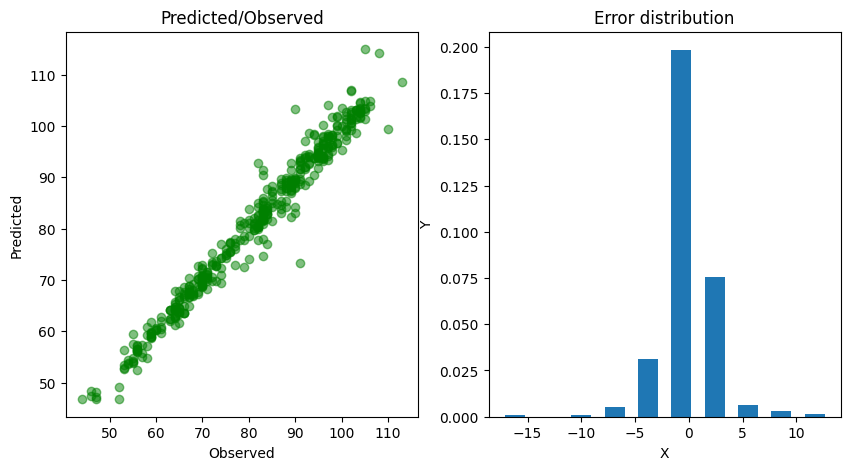

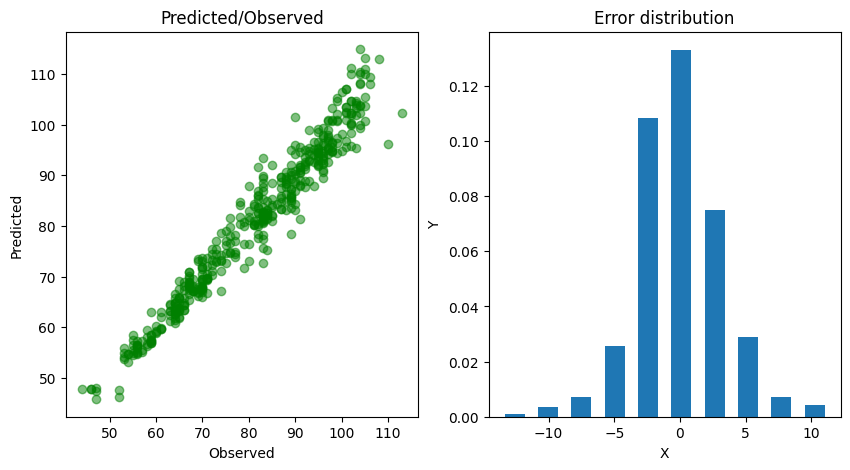

In [16]:
for col_name in result.columns:
    y_test = result['actual']
    y_pred = result[col_name]
    print('MODEL :%s\n' % col_name,
          'R^2= %.3f\n' % r2_score(y_test, y_pred),
          'MSE= %.3f\n' % mean_squared_error(y_test, y_pred),
          'MAE= %.3f\n' % mean_absolute_error(y_test, y_pred))
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    axs[0].set_title("Predicted/Observed")
    axs[0].set_xlabel("Observed")
    axs[0].set_ylabel("Predicted")
    axs[0].scatter(x=y_test, y=y_pred, color="g", marker="o", alpha=0.5)

    axs[1].set_title("Error distribution")
    axs[1].set_xlabel("X")
    axs[1].set_ylabel("Y")
    axs[1].hist(y_pred-y_test, bins=10, rwidth=0.6, density=True)

gc.collect()
